# jetson AGX javier에 darknet install 및 test

밑 셀들을 전부 실행하면 홈디렉토리에 darknet 폴더가 생성되며 darknet설치를 진행하게 됩니다.
test에서 detect가 잘 되면 설치가 완료된것입니다.

In [ ]:
!export LD_PRELOAD=/usr/lib/aarch64-linux-gnu/libgomp.so.1

In [ ]:
import os

In [ ]:
#홈 디렉토리로 이동
%cd ~

/home/atz


In [ ]:
#darknet clone
!git clone https://github.com/AlexeyAB/darknet.git

Cloning into 'darknet'...
remote: Enumerating objects: 15298, done.
remote: Total 15298 (delta 0), reused 0 (delta 0), pack-reused 15298
Receiving objects: 100% (15298/15298), 13.67 MiB | 3.55 MiB/s, done.
Resolving deltas: 100% (10400/10400), done.


In [ ]:
%cd darknet

/home/atz/darknet


In [ ]:
#darknet make를 위한 Makefile 수정
text_file_path = './Makefile'
new_text_content = ''
with open(text_file_path,'r') as f:
    lines = f.readlines()
    for i, l in enumerate(lines):
        if i == 0:
            new_string = 'GPU=1\n'
        elif i == 1:
            new_string = 'CUDNN=1\n'
        elif i == 2:
            new_string = 'CUDNN_HALF=1\n'
        elif i == 3:
            new_string = 'OPENCV=1\n'
        elif i == 6:
            new_string = 'LIBSO=1\n'
        elif i == 19:
            new_string = ''
        elif i == 20:
            new_string = 'ARCH= -gencode arch=compute_72,code=[sm_72,compute_72]'
        elif i == 21:
            new_string = ''
        elif i == 22:
            new_string = ''
        else:
            new_string = l
        
        if new_string:
            new_text_content += new_string
        else:
            new_text_content += ''
            
with open(text_file_path,'w') as f:
    f.write(new_text_content)

# make

make 시 다음과 같은 화면까지 진행되면 설치 완료된 것 입니다. 기다리면 다음 셀이 실행됩니다.

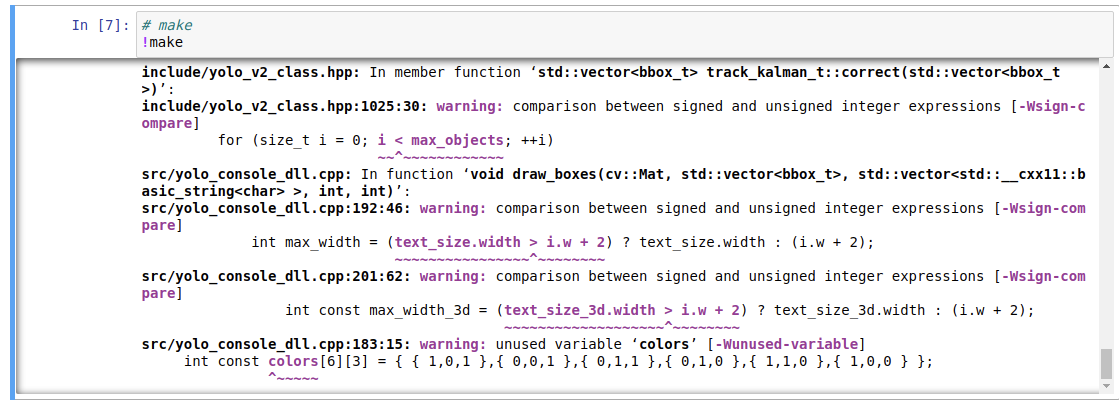

In [ ]:
# make
!make

mkdir -p ./obj/
mkdir -p backup
chmod +x *.sh
g++ -std=c++11 -std=c++11 -Iinclude/ -I3rdparty/stb/include -DOPENCV `pkg-config --cflags opencv4 2> /dev/null || pkg-config --cflags opencv` -DGPU -I/usr/local/cuda/include/ -DCUDNN -DCUDNN_HALF -Wall -Wfatal-errors -Wno-unused-result -Wno-unknown-pragmas -fPIC -Ofast -DOPENCV -DGPU -DCUDNN -I/usr/local/cudnn/include -DCUDNN_HALF -fPIC -c ./src/image_opencv.cpp -o obj/image_opencv.o
./src/image_opencv.cpp: In function ‘void draw_detections_cv_v3(void**, detection*, int, float, char**, image**, int, int)’:
./src/image_opencv.cpp:946:23: warning: variable ‘rgb’ set but not used [-Wunused-but-set-variable]
                 float rgb[3];
                       ^~~
./src/image_opencv.cpp: In function ‘void draw_train_loss(char*, void**, int, float, float, int, int, float, int, char*, float, int, int, double)’:
./src/image_opencv.cpp:1147:13: warning: this ‘if’ clause does not guard... [-Wmisleading-indentation]
             if (iteration_old ==

gcc -Iinclude/ -I3rdparty/stb/include -DOPENCV `pkg-config --cflags opencv4 2> /dev/null || pkg-config --cflags opencv` -DGPU -I/usr/local/cuda/include/ -DCUDNN -DCUDNN_HALF -Wall -Wfatal-errors -Wno-unused-result -Wno-unknown-pragmas -fPIC -Ofast -DOPENCV -DGPU -DCUDNN -I/usr/local/cudnn/include -DCUDNN_HALF -fPIC -c ./src/convolutional_layer.c -o obj/convolutional_layer.o
./src/convolutional_layer.c: In function ‘forward_convolutional_layer’:
./src/convolutional_layer.c:1341:32: warning: unused variable ‘t_intput_size’ [-Wunused-variable]
                         size_t t_intput_size = binary_transpose_align_input(k, n, state.workspace, &l.t_bit_input, ldb_align, l.bit_align);
                                ^~~~~~~~~~~~~
gcc -Iinclude/ -I3rdparty/stb/include -DOPENCV `pkg-config --cflags opencv4 2> /dev/null || pkg-config --cflags opencv` -DGPU -I/usr/local/cuda/include/ -DCUDNN -DCUDNN_HALF -Wall -Wfatal-errors -Wno-unused-result -Wno-unknown-pragmas -fPIC -Ofast -DOPENCV -DGPU -DC

gcc -Iinclude/ -I3rdparty/stb/include -DOPENCV `pkg-config --cflags opencv4 2> /dev/null || pkg-config --cflags opencv` -DGPU -I/usr/local/cuda/include/ -DCUDNN -DCUDNN_HALF -Wall -Wfatal-errors -Wno-unused-result -Wno-unknown-pragmas -fPIC -Ofast -DOPENCV -DGPU -DCUDNN -I/usr/local/cudnn/include -DCUDNN_HALF -fPIC -c ./src/crop_layer.c -o obj/crop_layer.o
gcc -Iinclude/ -I3rdparty/stb/include -DOPENCV `pkg-config --cflags opencv4 2> /dev/null || pkg-config --cflags opencv` -DGPU -I/usr/local/cuda/include/ -DCUDNN -DCUDNN_HALF -Wall -Wfatal-errors -Wno-unused-result -Wno-unknown-pragmas -fPIC -Ofast -DOPENCV -DGPU -DCUDNN -I/usr/local/cudnn/include -DCUDNN_HALF -fPIC -c ./src/dropout_layer.c -o obj/dropout_layer.o
gcc -Iinclude/ -I3rdparty/stb/include -DOPENCV `pkg-config --cflags opencv4 2> /dev/null || pkg-config --cflags opencv` -DGPU -I/usr/local/cuda/include/ -DCUDNN -DCUDNN_HALF -Wall -Wfatal-errors -Wno-unused-result -Wno-unknown-pragmas -fPIC -Ofast -DOPENCV -DGPU -DCUDNN -I/us

gcc -Iinclude/ -I3rdparty/stb/include -DOPENCV `pkg-config --cflags opencv4 2> /dev/null || pkg-config --cflags opencv` -DGPU -I/usr/local/cuda/include/ -DCUDNN -DCUDNN_HALF -Wall -Wfatal-errors -Wno-unused-result -Wno-unknown-pragmas -fPIC -Ofast -DOPENCV -DGPU -DCUDNN -I/usr/local/cudnn/include -DCUDNN_HALF -fPIC -c ./src/parser.c -o obj/parser.o
./src/parser.c: In function ‘parse_network_cfg_custom’:
./src/parser.c:1777:42: warning: passing argument 1 of ‘cudaHostAlloc’ from incompatible pointer type [-Wincompatible-pointer-types]
         if (cudaSuccess == cudaHostAlloc(&net.input_pinned_cpu, size * sizeof(float), cudaHostRegisterMapped)) net.input_pinned_cpu_flag = 1;
                                          ^
In file included from /usr/local/cuda/include/cuda_runtime.h:96:0,
                 from include/darknet.h:41,
                 from ./src/activations.h:3,
                 from ./src/activation_layer.h:4,
                 from ./src/parser.c:6:
/usr/local/cuda/include/cud

gcc -Iinclude/ -I3rdparty/stb/include -DOPENCV `pkg-config --cflags opencv4 2> /dev/null || pkg-config --cflags opencv` -DGPU -I/usr/local/cuda/include/ -DCUDNN -DCUDNN_HALF -Wall -Wfatal-errors -Wno-unused-result -Wno-unknown-pragmas -fPIC -Ofast -DOPENCV -DGPU -DCUDNN -I/usr/local/cudnn/include -DCUDNN_HALF -fPIC -c ./src/detector.c -o obj/detector.o
./src/detector.c: In function ‘train_detector’:
./src/detector.c:386:72: warning: suggest parentheses around ‘&&’ within ‘||’ [-Wparentheses]
          (iteration >= (iter_save + 1000) || iteration % 1000 == 0) && net.max_batches < 10000)
          ~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~^~~~~~~~~~~~~~~~~~~~~~~~~~
./src/detector.c: In function ‘print_cocos’:
./src/detector.c:486:29: warning: format not a string literal and no format arguments [-Wformat-security]
                 fprintf(fp, buff);
                             ^~~~
./src/detector.c: In function ‘eliminate_bdd’:
./src/detector.c:579:21: warning: statemen

gcc -Iinclude/ -I3rdparty/stb/include -DOPENCV `pkg-config --cflags opencv4 2> /dev/null || pkg-config --cflags opencv` -DGPU -I/usr/local/cuda/include/ -DCUDNN -DCUDNN_HALF -Wall -Wfatal-errors -Wno-unused-result -Wno-unknown-pragmas -fPIC -Ofast -DOPENCV -DGPU -DCUDNN -I/usr/local/cudnn/include -DCUDNN_HALF -fPIC -c ./src/rnn_layer.c -o obj/rnn_layer.o
gcc -Iinclude/ -I3rdparty/stb/include -DOPENCV `pkg-config --cflags opencv4 2> /dev/null || pkg-config --cflags opencv` -DGPU -I/usr/local/cuda/include/ -DCUDNN -DCUDNN_HALF -Wall -Wfatal-errors -Wno-unused-result -Wno-unknown-pragmas -fPIC -Ofast -DOPENCV -DGPU -DCUDNN -I/usr/local/cudnn/include -DCUDNN_HALF -fPIC -c ./src/gru_layer.c -o obj/gru_layer.o
gcc -Iinclude/ -I3rdparty/stb/include -DOPENCV `pkg-config --cflags opencv4 2> /dev/null || pkg-config --cflags opencv` -DGPU -I/usr/local/cuda/include/ -DCUDNN -DCUDNN_HALF -Wall -Wfatal-errors -Wno-unused-result -Wno-unknown-pragmas -fPIC -Ofast -DOPENCV -DGPU -DCUDNN -I/usr/local/cu

In file included from /usr/local/cuda/include/cuda_runtime.h:96:0,
                 from include/darknet.h:41,
                 from ./src/activations.h:3,
                 from ./src/layer.h:4,
                 from ./src/yolo_layer.h:5,
                 from ./src/yolo_layer.c:1:
/usr/local/cuda/include/cuda_runtime_api.h:4575:39: note: expected ‘void **’ but argument is of type ‘float **’
 extern __host__ cudaError_t CUDARTAPI cudaHostAlloc(void **pHost, size_t size, unsigned int flags);
                                       ^~~~~~~~~~~~~
./src/yolo_layer.c:115:42: warning: passing argument 1 of ‘cudaHostAlloc’ from incompatible pointer type [-Wincompatible-pointer-types]
         if (cudaSuccess != cudaHostAlloc(&l->delta, l->batch*l->outputs * sizeof(float), cudaHostRegisterMapped)) {
                                          ^
In file included from /usr/local/cuda/include/cuda_runtime.h:96:0,
                 from include/darknet.h:41,
                 from ./src/activations.h:3

gcc -Iinclude/ -I3rdparty/stb/include -DOPENCV `pkg-config --cflags opencv4 2> /dev/null || pkg-config --cflags opencv` -DGPU -I/usr/local/cuda/include/ -DCUDNN -DCUDNN_HALF -Wall -Wfatal-errors -Wno-unused-result -Wno-unknown-pragmas -fPIC -Ofast -DOPENCV -DGPU -DCUDNN -I/usr/local/cudnn/include -DCUDNN_HALF -fPIC -c ./src/upsample_layer.c -o obj/upsample_layer.o
gcc -Iinclude/ -I3rdparty/stb/include -DOPENCV `pkg-config --cflags opencv4 2> /dev/null || pkg-config --cflags opencv` -DGPU -I/usr/local/cuda/include/ -DCUDNN -DCUDNN_HALF -Wall -Wfatal-errors -Wno-unused-result -Wno-unknown-pragmas -fPIC -Ofast -DOPENCV -DGPU -DCUDNN -I/usr/local/cudnn/include -DCUDNN_HALF -fPIC -c ./src/lstm_layer.c -o obj/lstm_layer.o
gcc -Iinclude/ -I3rdparty/stb/include -DOPENCV `pkg-config --cflags opencv4 2> /dev/null || pkg-config --cflags opencv` -DGPU -I/usr/local/cuda/include/ -DCUDNN -DCUDNN_HALF -Wall -Wfatal-errors -Wno-unused-result -Wno-unknown-pragmas -fPIC -Ofast -DOPENCV -DGPU -DCUDNN -I/

./src/network_kernels.cu: In function ‘float train_network_datum_gpu(network, float*, float*)’:
./src/network_kernels.cu:379:7: warning: variable ‘l’ set but not used [-Wunused-but-set-variable]
         layer l = net.layers[net.n - 1];
       ^
nvcc -gencode arch=compute_72,code=[sm_72,compute_72] -gencode arch=compute_70,code=[sm_70,compute_70] -Iinclude/ -I3rdparty/stb/include -DOPENCV `pkg-config --cflags opencv4 2> /dev/null || pkg-config --cflags opencv` -DGPU -I/usr/local/cuda/include/ -DCUDNN -DCUDNN_HALF --compiler-options "-Wall -Wfatal-errors -Wno-unused-result -Wno-unknown-pragmas -fPIC -Ofast -DOPENCV -DGPU -DCUDNN -I/usr/local/cudnn/include -DCUDNN_HALF -fPIC" -c ./src/avgpool_layer_kernels.cu -o obj/avgpool_layer_kernels.o
g++ -std=c++11 -std=c++11 -Iinclude/ -I3rdparty/stb/include -DOPENCV `pkg-config --cflags opencv4 2> /dev/null || pkg-config --cflags opencv` -DGPU -I/usr/local/cuda/include/ -DCUDNN -DCUDNN_HALF -Wall -Wfatal-errors -Wno-unused-result -Wno-unknown-pra

In file included from src/yolo_console_dll.cpp:23:0:
include/yolo_v2_class.hpp: In member function ‘void track_kalman_t::clear_old_states()’:
include/yolo_v2_class.hpp:879:50: warning: comparison between signed and unsigned integer expressions [-Wsign-compare]
                 if ((result_vec_pred[state_id].x > img_size.width) ||
include/yolo_v2_class.hpp:880:50: warning: comparison between signed and unsigned integer expressions [-Wsign-compare]
                     (result_vec_pred[state_id].y > img_size.height))
include/yolo_v2_class.hpp: In member function ‘track_kalman_t::tst_t track_kalman_t::get_state_id(bbox_t, std::vector<bool>&)’:
include/yolo_v2_class.hpp:900:30: warning: comparison between signed and unsigned integer expressions [-Wsign-compare]
         for (size_t i = 0; i < max_objects; ++i)
                            ~~^~~~~~~~~~~~~
include/yolo_v2_class.hpp: In member function ‘std::vector<bbox_t> track_kalman_t::predict()’:
include/yolo_v2_class.hpp:990:30: warning: 

In [ ]:
#yolov4.weights 다운로드
!gdown https://drive.google.com/uc?id=1cewMfusmPjYWbrnuJRuKhPMwRe_b9PaT

Downloading...
From: https://drive.google.com/uc?id=1cewMfusmPjYWbrnuJRuKhPMwRe_b9PaT
To: /home/atz/darknet/yolov4.weights
258MB [00:31, 8.09MB/s] 


# test

다음 셀 실행시 사진이 동일하게 뜨면 설치 완료

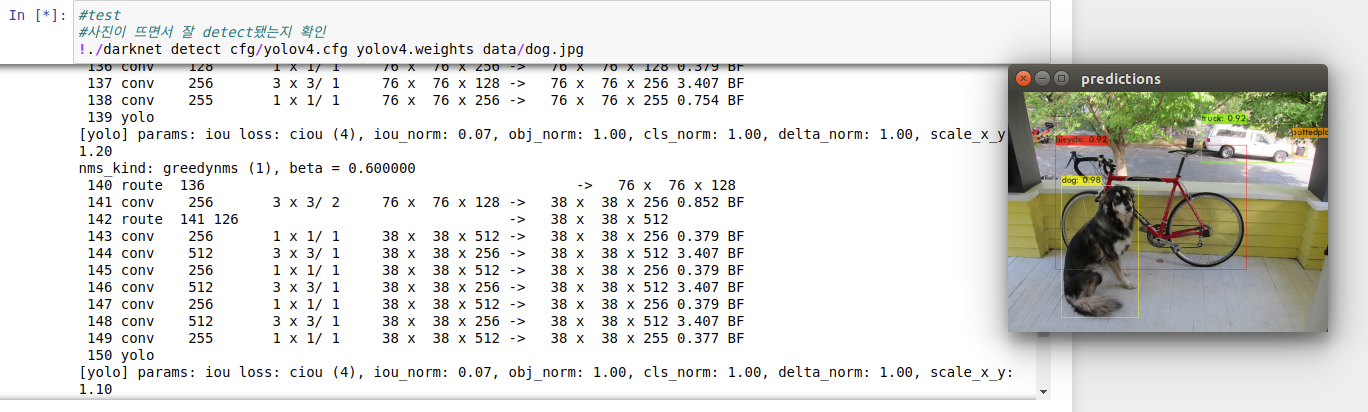

In [ ]:
#test
#사진이 뜨면서 잘 detect됐는지 확인
!./darknet detect cfg/yolov4.cfg yolov4.weights data/dog.jpg

 CUDA-version: 10020 (10020), cuDNN: 8.0.0, CUDNN_HALF=1, GPU count: 1  
 CUDNN_HALF=1 
 OpenCV version: 4.1.1
 0 : compute_capability = 720, cudnn_half = 1, GPU: Xavier 
net.optimized_memory = 0 
mini_batch = 1, batch = 8, time_steps = 1, train = 0 
   layer   filters  size/strd(dil)      input                output
   0 Create CUDA-stream - 0 
 Create cudnn-handle 0 
conv     32       3 x 3/ 1    608 x 608 x   3 ->  608 x 608 x  32 0.639 BF
   1 conv     64       3 x 3/ 2    608 x 608 x  32 ->  304 x 304 x  64 3.407 BF
   2 conv     64       1 x 1/ 1    304 x 304 x  64 ->  304 x 304 x  64 0.757 BF
   3 route  1 		                           ->  304 x 304 x  64 
   4 conv     64       1 x 1/ 1    304 x 304 x  64 ->  304 x 304 x  64 0.757 BF
   5 conv     32       1 x 1/ 1    304 x 304 x  64 ->  304 x 304 x  32 0.379 BF
   6 conv     64       3 x 3/ 1    304 x 304 x  32 ->  304 x 304 x  64 3.407 BF
   7 Shortcut Layer: 4,  wt = 0, wn = 0, outputs: 304 x 304 x  64 0.006 BF
   8 conv     

 102 conv    512       1 x 1/ 1     19 x  19 x 512 ->   19 x  19 x 512 0.189 BF
 103 route  102 87 	                           ->   19 x  19 x1024 
 104 conv   1024       1 x 1/ 1     19 x  19 x1024 ->   19 x  19 x1024 0.757 BF
 105 conv    512       1 x 1/ 1     19 x  19 x1024 ->   19 x  19 x 512 0.379 BF
 106 conv   1024       3 x 3/ 1     19 x  19 x 512 ->   19 x  19 x1024 3.407 BF
 107 conv    512       1 x 1/ 1     19 x  19 x1024 ->   19 x  19 x 512 0.379 BF
 108 max                5x 5/ 1     19 x  19 x 512 ->   19 x  19 x 512 0.005 BF
 109 route  107 		                           ->   19 x  19 x 512 
 110 max                9x 9/ 1     19 x  19 x 512 ->   19 x  19 x 512 0.015 BF
 111 route  107 		                           ->   19 x  19 x 512 
 112 max               13x13/ 1     19 x  19 x 512 ->   19 x  19 x 512 0.031 BF
 113 route  112 110 108 107 	                   ->   19 x  19 x2048 
 114 conv    512       1 x 1/ 1     19 x  19 x2048 ->   19 x  19 x 512 0.757 BF
 115 conv  